In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [2]:
data = pd.read_csv("hgmd.raw.matrix.csv")
data['phenotype'] = data['phenotype'] + ' (chr' + data['CHROM_hg19'].astype(str) + ':' + data['POS_hg19'].astype(str) +  ', ' + data['REF'].astype(str) + ' to ' + data['ALT'].astype(str) +  ')'

In [3]:
data1 = data.iloc[:,9:]
data1.drop(data1.iloc[:, 1:3], axis = 1, inplace = True)
data2 = data1.set_index('phenotype')

In [4]:
cm = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])

In [5]:
def summary_results(data, phenotype):
    data_c = data.T.copy()
    labels = list(data_c.columns.values.tolist())
    index = data_c.columns.get_loc(phenotype)
    
    if not index in range(len(data)):
        print("Index is not in range.")
        return
    
    s = data_c[[labels[index]]].copy()
    s1 = s.sort_values(by = labels[index], key=abs, ascending = False)
    
    y = s1.head(7).to_numpy()
    x = s1.head(7).T.columns.values.tolist()
    
    plt.figure(figsize=(10, 5))

    sc = plt.scatter(x, abs(y), c=y, vmin=-8, vmax=8, s=100, cmap=cm)
    plt.xticks(rotation = 305, fontsize = 15)
    plt.yticks(fontsize = 20)
    plt.colorbar(sc)
    
    legend_elements = [Line2D([0], [0], marker='.', color='w', label='Negative',
                          markerfacecolor='b', markersize=25),
                   Line2D([0], [0], marker='.', color='w', label='Positive',
                          markerfacecolor='r', markersize=25)]
    
    legend = plt.legend(handles = legend_elements, loc = 1, fontsize = 'x-large', title = "Effect direction\n",
                       title_fontsize = 15, fancybox = True)
    
    title = f"Relevant sequence class-level variant effects:\n{phenotype}"

    plt.xlabel('chromatin profiles', fontsize = 15)
    plt.ylabel('Absolute value of variant effect score', fontsize = 15)
    plt.title(title, fontsize = 15)
    plt.show()
    
    

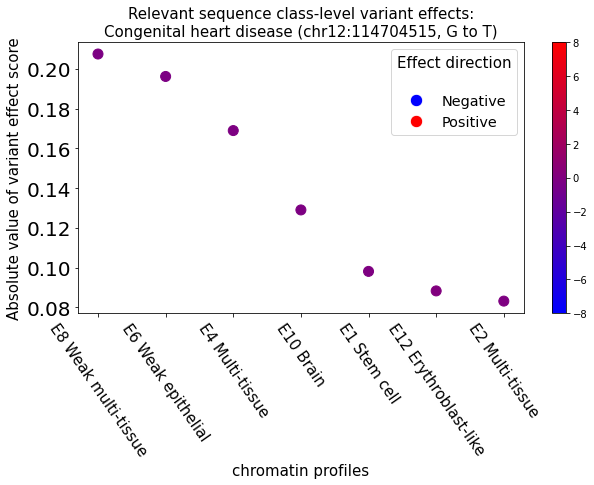

In [6]:
summary_results(data2, "Congenital heart disease (chr12:114704515, G to T)")